By the end of this project we would have created a machine learning model that can predict TOMORROW's S&P500 index price given historical data. We will also have backtested this model on 20+ years of historical data so we can be confident in prediction this model is making.

The Standard and Poor's 500 or S&P500 is the stock market index tracking the stock performance of 500 large companies listed on Stock Exchanges in USA. It is one of the most followed equity indices having more than $ 5 trillion invested in assets tied to performance of this index. 

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import yfinance as yf
#this package calls the Yahoo finance api to download daily stock and index prices.

In [3]:
#getting data of Index S&P500
sp500 = yf.Ticker("^GSPC")

In [4]:
sp500 = sp500.history(period = "max")

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0
...,...,...,...,...,...,...,...
2022-12-12 00:00:00-05:00,3939.290039,3990.709961,3935.300049,3990.560059,3904130000,0,0
2022-12-13 00:00:00-05:00,4069.379883,4100.959961,3993.030029,4019.649902,5079360000,0,0
2022-12-14 00:00:00-05:00,4015.540039,4053.760010,3965.649902,3995.320068,4472340000,0,0


In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2022-12-05 00:00:00-05:00', '2022-12-06 00:00:00-05:00',
               '2022-12-07 00:00:00-05:00', '2022-12-08 00:00:00-05:00',
               '2022-12-09 00:00:00-05:00', '2022-12-12 00:00:00-05:00',
               '2022-12-13 00:00:00-05:00', '2022-12-14 00:00:00-05:00',
               '2022-12-15 00:00:00-05:00', '2022-12-16 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23856, freq=None)

## Cleaning and Visualizing our Stock market data

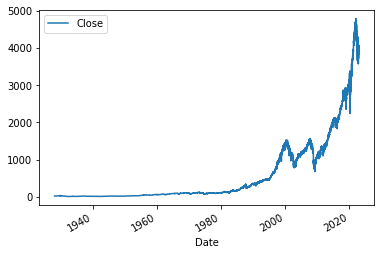

In [7]:
sp500.plot.line(y="Close", use_index = True)

Delete the columns which we don't need. These columns are more relevant to individual stock and not the Index.

In [8]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [9]:
#checking NULL values presence
sp500.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Setting up our Target column named 'Tomorrow'. This is what we will be predicting using machine learning. The Target is if the price will go up or down tomorrow. The main emphasis here is on directionality(stock going up or down) and not on absolute price.

In [10]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2022-12-12 00:00:00-05:00,3939.290039,3990.709961,3935.300049,3990.560059,3904130000,4019.649902
2022-12-13 00:00:00-05:00,4069.379883,4100.959961,3993.030029,4019.649902,5079360000,3995.320068
2022-12-14 00:00:00-05:00,4015.540039,4053.760010,3965.649902,3995.320068,4472340000,3895.750000


In [12]:
#Creating column "Target" which shows if the price went up next day?
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2022-12-12 00:00:00-05:00,3939.290039,3990.709961,3935.300049,3990.560059,3904130000,4019.649902,1
2022-12-13 00:00:00-05:00,4069.379883,4100.959961,3993.030029,4019.649902,5079360000,3995.320068,0
2022-12-14 00:00:00-05:00,4015.540039,4053.760010,3965.649902,3995.320068,4472340000,3895.750000,0


There is lot of historical data available which is generally good to have but in stock market if we go back too far market may have shifted fundamentally and some of that data may not be useful in making future prediction. So we are gonna remove data before year 1990. 

In [14]:
#Taking records after January 1990 
sp500 = sp500.loc["1990-01-01":].copy()

sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-12-12 00:00:00-05:00,3939.290039,3990.709961,3935.300049,3990.560059,3904130000,4019.649902,1
2022-12-13 00:00:00-05:00,4069.379883,4100.959961,3993.030029,4019.649902,5079360000,3995.320068,0
2022-12-14 00:00:00-05:00,4015.540039,4053.760010,3965.649902,3995.320068,4472340000,3895.750000,0


## Training an initial machine learning model

I am taking "**Random Forest classifier**" as a model as it trains bunch of individual decision tree over a randomized parameters and average the result from those decision trees. So because of this, Randomforest is resistant to overfitting(yes it can overfit but it is very less likely compared to others).
It also runs faster and can pick up non linear tendencies in data(We have non linear corelation between open price and 'Target' next day close price).


In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, 
                               random_state = 1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume","Open","High","Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

Let's measure how accurate our model is. We will use 'Precision_score' as it suits well in this case.

Precision score is True Positive/(True Positive + False Positive)

In our case, it will check what % of times model predicted stock price go up and it actually go up.


In [16]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [17]:
preds

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [18]:
import pandas as pd

preds =pd.Series(preds, index = test.index)

preds

Date
2022-07-28 00:00:00-04:00    1
2022-07-29 00:00:00-04:00    1
2022-08-01 00:00:00-04:00    1
2022-08-02 00:00:00-04:00    1
2022-08-03 00:00:00-04:00    0
                            ..
2022-12-12 00:00:00-05:00    0
2022-12-13 00:00:00-05:00    1
2022-12-14 00:00:00-05:00    1
2022-12-15 00:00:00-05:00    1
2022-12-16 00:00:00-05:00    1
Length: 100, dtype: int64

In [19]:
precision_score(test["Target"], preds)

0.37037037037037035

Our model is not good enough. We can instead do opposite what this model is predicting and be successful :) !!!

In [20]:
combined = pd.concat([test["Target"], preds], axis = 1)

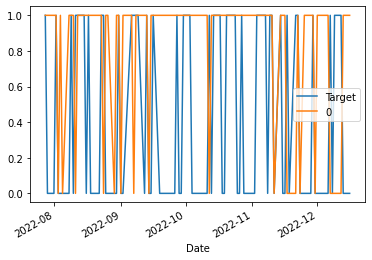

In [21]:
combined.plot()

## Building a back testing system

In [22]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index = test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis = 1)
  return combined

In [23]:
# taking first 10 years (2500 days) and train our model and predict next year(250 days)
def backtest(data, model, predictors, start = 2500, step = 250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [24]:
predictions = backtest(sp500, model, predictors)

In [25]:
predictions["Predictions"].value_counts()

0    3379
1    2427
Name: Predictions, dtype: int64

In [26]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5286361763494025

Our model predicts almost 53%. 
Let's compare what % market went up actually.

In [27]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.534103
0    0.465897
Name: Target, dtype: float64

Market actually went up 53%.  
So our model is not doing extra good here.  
But our confidence in the model has increased after backtesting.

## Adding additional predictors to our model to see if it improves the accuracy.

In [28]:
horizons = [2,5,60,250,1000]

new_predictors = []

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()
  
  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [29]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-12 00:00:00-05:00,3939.290039,3990.709961,3935.300049,3990.560059,3904130000,4019.649902,1,1.007089,1.0,1.009572,2.0,1.042514,23.0,0.963873,109.0,1.103598,544.0
2022-12-13 00:00:00-05:00,4069.379883,4100.959961,3993.030029,4019.649902,5079360000,3995.320068,0,1.003632,2.0,1.012913,3.0,1.049566,23.0,0.971548,109.0,1.111130,545.0
2022-12-14 00:00:00-05:00,4015.540039,4053.760010,3965.649902,3995.320068,4472340000,3895.750000,0,0.996964,1.0,1.003677,3.0,1.042581,23.0,0.966296,109.0,1.103939,544.0


In [30]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09 00:00:00-05:00,3954.169922,3977.020020,3933.040039,3934.379883,3888260000,3990.560059,1,0.996312,1.0,0.994942,1.0,1.028362,22.0,0.949713,108.0,1.088535,543.0
2022-12-12 00:00:00-05:00,3939.290039,3990.709961,3935.300049,3990.560059,3904130000,4019.649902,1,1.007089,1.0,1.009572,2.0,1.042514,23.0,0.963873,109.0,1.103598,544.0
2022-12-13 00:00:00-05:00,4069.379883,4100.959961,3993.030029,4019.649902,5079360000,3995.320068,0,1.003632,2.0,1.012913,3.0,1.049566,23.0,0.971548,109.0,1.111130,545.0


## Improving our model
increasing n_estimator to 200 and reducing min_samples_split to 50  

This is called 'Hyper Parameter Tuning'.

In [31]:
model = RandomForestClassifier(n_estimators= 200, min_samples_split= 50, random_state= 1)

"model.predict" gives output as 0 or 1.  
"model.predict_proba" gives output as probability values. So we can customize the threshold value to increase precision. 

In [32]:

def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds >= 0.6] = 1
  preds[preds < 0.6] = 0
  preds = pd.Series(preds, index = test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis = 1)
  return combined

In [33]:
predictions = backtest(sp500, model, new_predictors)

In [34]:
predictions["Predictions"].value_counts()

0.0    3992
1.0     813
Name: Predictions, dtype: int64

In [35]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5694956949569495

So the model has 57% precision score and performed little better than actual(53%). This is also a good result considering we have only historical data to work with.


# Scope of further work on this project.

1.   We worked on S&P500 index which is American stock market index. Other countries stock market opens earlier than the American's, so we can merge that data with this data and see if there is any correlation.

2. All Index have bunch of stocks. In S&P500 we have 500 largest companies. If any sector(Tech, Financial, FMCG etc) have higher weightage in Index, we can include that sectors trend data.

3. We can also include other macroeconomic data like interest rate, inflation % etc in the data.

4.   We can increase the resolution of stock price. We have used daily data but we can use hourly or secondwise data.



# I hope you liked the analysis
# Thanks